In [2]:
import os 
import sys
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
import seaborn as sns
from matplotlib.pyplot import cm
from mpl_toolkits import mplot3d
from scipy.stats import linregress

os.chdir('C:/Users/PC/Desktop/langenuenprogram')
path = os.getcwd()
sys.path.append(path)

from Scripts.Optimize.Quantities import HangerVolume,GirderVolume,TowerVolume,CableVolumePlus

def GenListOfHeights(lb,ub,step):
    heights = np.arange(lb, ub, step)
    if heights[-1] != ub:
        heights = np.append(heights, ub)
    op = [round(h,2) for h in heights]      
    return op

In [10]:
t_heights   = GenListOfHeights(180, 260, 1)
g_heights   = GenListOfHeights(3.5, 4.5, 0.25)
p_type      = 2022

Alu_girder_cost = 326948    # [NOK/m3]
Conc_tower_cost = 86535     # [NOK/m3]
Steel_cable_cost = 691358  # [NOK/m3]
Steel_hanger_cost = 1543210 # [NOK/m3]

Shape = (len(g_heights),len(t_heights))

HangerCost  = np.zeros(Shape)
GirderCost  = np.zeros(Shape)
TowerCost  = np.zeros(Shape)
CableCost   = np.zeros(Shape)

CableForce = []
CableArea = []

In [14]:
t_H = 180
g_H = 4.0

cv, c_sf_max, c_A, cl = CableVolumePlus(t_H, g_H, p_type)

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=5,5 nx,ny=13,13 m=45 fp=1911937279.196462 s=0.000000


ValueError: not enough values to unpack (expected 4, got 3)

In [11]:
for i,g_H in enumerate(g_heights):
    for j, t_H in enumerate(t_heights):
        
        cv, c_sf_max, c_A = CableVolumePlus(t_H, g_H, p_type)
        
        if g_H == 4.0:
            CableForce.append(c_sf_max)
            CableArea.append(c_A)
            
        
        HangerCost[i,j] = HangerVolume(t_H, g_H, p_type)    * Steel_hanger_cost
        GirderCost[i,j] = GirderVolume(g_H, p_type)         * Alu_girder_cost
        TowerCost[i,j] = TowerVolume(t_H)                   * Conc_tower_cost
        CableCost[i,j]  = cv * Steel_cable_cost

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=5,5 nx,ny=13,13 m=45 fp=1911937279.196462 s=0.000000
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=5,5 nx,ny=13,13 m=45 fp=7779.302646 s=0.000000


In [5]:
# Gradients -- 0 = girder heights axis -- 1 = tower height axis

tc_g = np.gradient(TowerCost,20)[1]
gc_g = np.gradient(GirderCost)[0]
print(len(tc_g))
print(np.mean(tc_g))
cc_g = np.gradient(CableCost)
hc_g = np.gradient(HangerCost)

5
177061.25240133886


In [6]:
print(CableForce)

[210205125.49746838, 206254667.97877422, 201613127.4660946, 196627934.83261004, 191552795.40301657, 186561335.97564143, 181760751.8445602, 177205453.82171154, 172910715.2590142, 168866319.0704824, 165050172.16398737, 161440018.66629595, 158017549.18575782, 154767878.83242053, 151678684.388344, 148739341.39897397, 145940061.26451603, 143271028.33130866, 140721536.9831974, 138279128.73290807, 135928729.31342062]


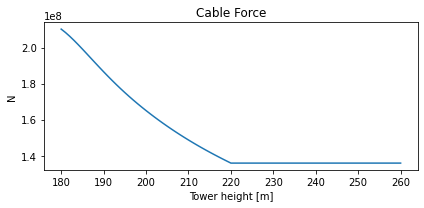

In [12]:
%matplotlib inline

plt.figure(figsize=(6,3))
plt.title('Cable Force')
plt.ylabel('N')
plt.xlabel('Tower height [m]')
plt.plot(t_heights,CableForce)
plt.tight_layout()
plt.savefig(path + '/Attachments/Optimize/Cableforce.png',dpi=300)

Text(0.5, 1.0, 'Tower cost')

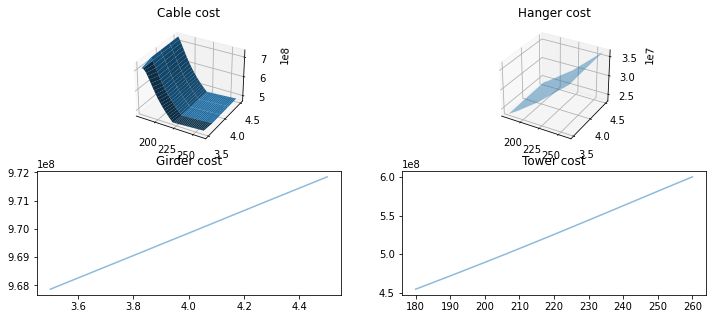

In [13]:
%matplotlib inline
X, Y = np.meshgrid(t_heights,g_heights)
fig = plt.figure(figsize=(12,5))

# FIGURE 1 - Cable cost
ax = fig.add_subplot(221, projection='3d')
ax.plot_surface(X, Y, CableCost,  alpha=1)
ax.set_title('Cable cost')

# FIGURE 2 - Hanger cost
ax = fig.add_subplot(222, projection='3d')
ax.plot_surface(X, Y, HangerCost,  alpha=0.5)
ax.set_title('Hanger cost')

# FIGURE 2 - Girder cost
ax = fig.add_subplot(223)
ax.plot(g_heights, GirderCost[:,0],  alpha=0.5)
ax.set_title('Girder cost')

# FIGURE 3 - Tower cost
ax = fig.add_subplot(224)
ax.plot(t_heights, TowerCost[0,:],  alpha=0.5)
ax.set_title('Tower cost')

#plt.tight_layout()


In [9]:
%matplotlib qt

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')



surf1 = ax.plot_surface(X, Y, TowerCost,  alpha=0.5,color='r',rstride=1,cstride=1,label='Tower cost')
surf1._facecolors2d = surf1._facecolor3d
surf1._edgecolors2d = surf1._edgecolor3d

surf2 = ax.plot_surface(X, Y, GirderCost,  alpha=0.5,color='g',rstride=1,cstride=1,label='Girder cost')
surf2._facecolors2d = surf2._facecolor3d
surf2._edgecolors2d = surf2._edgecolor3d

surf3 = ax.plot_surface(X, Y, CableCost,  alpha=0.5,color='b',rstride=1,cstride=1,label='Cable cost')
surf3._facecolors2d = surf3._facecolor3d
surf3._edgecolors2d = surf3._edgecolor3d

surf4 = ax.plot_surface(X, Y, HangerCost,  alpha=0.5,color='y',rstride=1,cstride=1,label='Hanger cost')
surf4._facecolors2d = surf4._facecolor3d
surf4._edgecolors2d = surf4._edgecolor3d



ax.legend(loc='upper right')
ax.view_init(azim=-50, elev=16)
plt.xlabel('Tower height [m]')
plt.ylabel('Girder height [m]')
ax.set_zlabel('NOK',rotation=90)
#ax.text2D(0.4, 0.90, 'Part cost', transform=ax.transAxes)
#ax.set_zlim3d(0.4e9,1e9)
plt.savefig(path + '/Attachments/Optimize/CostPerPart.png',dpi=300)